In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

bands = pd.read_csv('data/ma_bands_data.csv', index_col=0)
bands['theme'] = bands['theme'].fillna('')

songs = pd.read_csv('data/ma_songs_lyrics.csv', index_col=0)
songs = songs[  (songs['lyrics'] != '(lyrics not available)')
              & (songs['lyrics'] != '(Instrumental)')
              & ~songs['lyrics'].str.contains('[^\x00-\x7f]')]
songs = pd.merge(bands, songs, left_on='name', right_on='band_name')

In [2]:
songs

,name,url,genre,theme,label,country,location,status,date,years,album_url,band_name,album_name,album_type,song_name,song_id,lyrics
0,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Ace of Spades (Motörhead cover),803073,"If you like to gamble, I tell you I'm your man..."
1,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Bark at the Moon (Ozzy Osbourne cover),803063,SCREAMS BREAK THE SILENCE \r\nWAKING FROM THE ...
2,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Crazy Train (Ozzy Osbourne cover),803071,"All aboard, hah hah \r\n\r\nCrazy, but that's ..."
3,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Don't Talk to Strangers (Dio cover),803068,Don't talk to strangers \r\nMmmmh \r\n\r\nDon'...
4,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Freewheel Burning (Judas Priest cover),803070,Fast and furious \r\nWe ride the universe \r\n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799759,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,Songs for Darkspirits,Full-length,"Sweet, Gesture of the Death",1150474,"slumber,\r\nPeace.\r\n\r\nthis harmony to natu..."
799760,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,When Fatigue Devours Reincarnation,EP,Diary of a Decaying Man,1150491,At the end of Chaos(The man who engulfed himse...
799761,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,흉가,Full-length,통곡의 서막 / Prelude to Tremendous Sadness,2213275,"my lady, wake up,\r\nin this cold night.\r\nyo..."
799762,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,흉가,Full-length,흉가에 얽힌 이야기 Part III / The Tale from the Hounte...,2213273,Beauty was this hill\r\nfilled with this blood...


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, token_pattern="middle eastern|[0-9a-z'\-]+", min_df=1000,
                             stop_words=['metal', 'rock', "'n'", 'roll', 'early', 'mid', 'later',
                                         'and', 'elements', 'influences', 'various', 'with'])
genre_mat = vectorizer.fit_transform(songs['genre'])
genre_names = vectorizer.get_feature_names_out()
print(genre_names)

['alternative' 'ambient' 'atmospheric' 'avant-garde' 'black' 'blackened'
 'brutal' 'crossover' 'crust' 'dark' 'death' 'deathcore' 'depressive'
 'doom' 'drone' 'electronic' 'epic' 'experimental' 'extreme' 'folk'
 'funeral' 'goregrind' 'gothic' 'grindcore' 'groove' 'hard' 'hardcore'
 'heavy' 'industrial' 'melodic' 'metalcore' 'neoclassical' 'noise'
 'nu-metal' 'nwobhm' 'pagan' 'post-black' 'post-metal' 'power'
 'progressive' 'psychedelic' 'punk' 'raw' 'slam' 'sludge' 'southern'
 'speed' 'stoner' 'symphonic' 'technical' 'thrash' 'viking']


Firstly, I extract the top 15 most occuring genre names. It is assumed that all songs by one band would be under the same genre.

In [144]:
genre_sum = genre_mat.sum(axis=0)
top_genres = np.argsort(genre_sum)[0, -1 : -16 : -1]
print(top_genres[0])
print(genre_names[top_genres])
print((genre_sum[0, top_genres] / songs.shape[0]))

[[10 50  4 27 38 29 13 39 23 46 22 24  6 48 25]]
[['death' 'thrash' 'black' 'heavy' 'power' 'melodic' 'doom' 'progressive'
  'grindcore' 'speed' 'gothic' 'groove' 'brutal' 'symphonic' 'hard']]
[[0.3566102  0.23623219 0.21140862 0.17797375 0.09440785 0.09241351
  0.07428691 0.07104221 0.03624569 0.03446142 0.03313352 0.03107417
  0.03009638 0.02739058 0.02723428]]


Since one song could have multiple genre labels, I will consider whether a song belongs to each genre or not (binary classification with respect to each genre).

As the data is highly imbalanced when considering the fraction of songs belonging to any individual genre, an undersampling is done to the songs not belonging to that genre.

In [61]:
from sklearn.model_selection import train_test_split

def balance(X, y):
    not_belong_pos = np.flatnonzero(~y)
    belong_pos = np.flatnonzero(y)
    np.random.seed(0)
    not_belong_pos = np.random.choice(not_belong_pos, belong_pos.shape[0], replace=False)
    sample_pos = np.concatenate((not_belong_pos, belong_pos))

    X = X[sample_pos]
    y = np.concatenate((np.zeros(not_belong_pos.shape[0], dtype=y.dtype),
                              np.ones(belong_pos.shape[0], dtype=y.dtype)))
    return X, y

def get_train_test(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y.toarray().ravel(),
                                                        test_size=test_size,
                                                        random_state=0)
    
    X_train, y_train = balance(X_train, y_train)

    # print('Sample size:', not_belong_pos.shape[0], '+', belong_pos.shape[0])

    return X_train, X_test, y_train, y_test

I score the performance of using multinomial naive bayes on each genre. Measuring the performance with the scoring function provided by the model is not good, as it simply calculates the fraction of the correctly classified data, which does not represent the performance on unbalanced data well. Instead, I prefer to use Matthews correlation coefficient, which is a better metric for the performance using unbalanced data.

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef

for genre_pos in np.asarray(top_genres).ravel():
    sample = songs['lyrics'].sample(50000, random_state=0)

    vectorizer = TfidfVectorizer(smooth_idf=False)
    lyrics_mat = vectorizer.fit_transform(sample)

    X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

    mnb = MultinomialNB()
    y_pred = mnb.fit(X_train, y_train).predict(X_test)
    print(f'{genre_pos: <10}{genre_names[genre_pos]: <15} \
            {mnb.score(X_test, y_test): <10}{matthews_corrcoef(y_test, y_pred)}')

10        death                      0.6434    0.22921397685971787
50        thrash                     0.5846    0.17614512505763152
4         black                      0.6904    0.263273347851043
27        heavy                      0.5934    0.22559856498184652
38        power                      0.4336    0.17277021486910057
29        melodic                    0.334     0.09435779966580214
13        doom                       0.6616    0.12542070972736918
39        progressive                0.4152    0.10816995302292835
23        grindcore                  0.916     0.12320179828168006
46        speed                      0.478     0.05708435093769165
22        gothic                     0.4418    0.08284631053329308
24        groove                     0.4422    0.056536014494460544
6         brutal                     0.859     0.14931246769010667
48        symphonic                  0.2648    0.07208807263595413
25        hard                       0.5664    0.10920328681512

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef

genre_pos = 4

for ngram_low in range(1, 4):
    for ngram_high in range(ngram_low, 4):
        sample = songs['lyrics'].sample(50000, random_state=0)

        vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(ngram_low, ngram_high))
        lyrics_mat = vectorizer.fit_transform(sample)

        X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

        mnb = MultinomialNB()
        y_pred = mnb.fit(X_train, y_train).predict(X_test)
        print(f'({ngram_low}, {ngram_high}) {matthews_corrcoef(y_test, y_pred)}')

(1, 1) 0.263273347851043
(1, 2) 0.2645782834383658
(1, 3) 0.25942785053348855
(2, 2) 0.25789206815809673
(2, 3) 0.24404512729042427
(3, 3) 0.21001963732123796


In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef

genre_pos = 4

for stop_words in (None, 'english'):
    sample = songs['lyrics'].sample(50000, random_state=0)

    vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(1, 2), stop_words=stop_words)
    lyrics_mat = vectorizer.fit_transform(sample)

    X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

    mnb = MultinomialNB()
    y_pred = mnb.fit(X_train, y_train).predict(X_test)
    print(f'{str(stop_words):<10}{matthews_corrcoef(y_test, y_pred)}')

None      0.2645782834383658
english   0.26026754714172456


In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef

genre_pos = 4

for max_df_10 in range(1, 11, 1):
    sample = songs['lyrics'].sample(50000, random_state=0)

    vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(1, 2), max_df=max_df_10 / 10)
    lyrics_mat = vectorizer.fit_transform(sample)

    X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

    mnb = MultinomialNB()
    y_pred = mnb.fit(X_train, y_train).predict(X_test)
    print(f'{max_df_10 / 10} {matthews_corrcoef(y_test, y_pred)}')

0.1 0.25661580602885586
0.2 0.2604124911654709
0.3 0.2617017580056059
0.4 0.26248966945679525
0.5 0.26641037379759397
0.6 0.26747143202935614
0.7 0.26747143202935614
0.8 0.2672106574932251
0.9 0.2656310276743899
1.0 0.2645782834383658


In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

genre_pos = 4

sample = songs['lyrics'].sample(100000, random_state=0)

vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(1, 2), max_df=0.6)
lyrics_mat = vectorizer.fit_transform(sample)
lyrics_words = vectorizer.get_feature_names_out()
print(lyrics_words)

X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

['00' '00 00' '00 04' ... 'zyt hie' 'zywa' 'zywa lezysz']


0.2749220554493917
['you' 'my' 'your' 'me' 'we' 'it' 'for' 'will' 'all' 'this' 'no' 'that'
 'on' 'are' 'with' 'of the' 'be' 'from' 'can' 'they' 'in the' 'life' 'our'
 'now' 'by' 'as' 'what' 'time' 'so' 'death' 'one' 'but' 'see' 'their' 're'
 'he' 'his' 'there' 'll' 'have' 'not' 'don' 'blood' 'world' 'never' 'out'
 'am' 'when' 'to the' 'into' 'eyes' 'like' 'night' 'just' 'was' 'know'
 'through' 'pain' 'away' 'down' 'soul' 'feel' 'at' 'mind' 'die' 'her' 've'
 'come' 'way' 'up' 'has' 'take' 'end' 'light' 'only' 'you re' 'who'
 'where' 'us' 'from the' 'god' 'dead' 'again' 'she' 'do' 'day' 'an' 'more'
 'hell' 'on the' 'let' 'love' 'inside' 'black' 'here' 'them' 'fire' 'back'
 'for the' 'fear']
['you' 'my' 'your' 'me' 'we' 'of the' 'for' 'will' 'with' 'it' 'this'
 'all' 'from' 'are' 'in the' 'that' 'our' 'on' 'as' 'by' 'no' 'be' 'death'
 'they' 'life' 'blood' 'their' 'his' 'night' 'now' 'can' 'to the' 'am'
 'so' 'one' 'into' 'black' 'time' 'but' 'world' 'he' 'see' 'have' 'not'
 'through' 'go

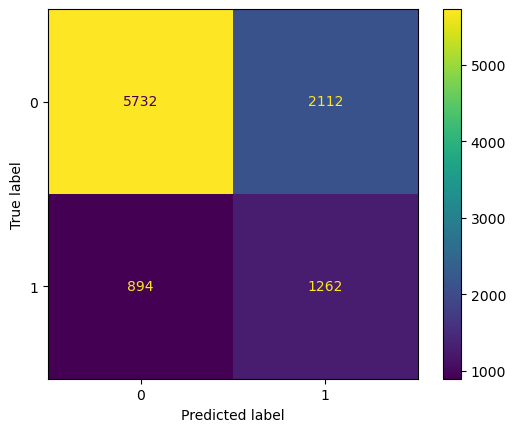

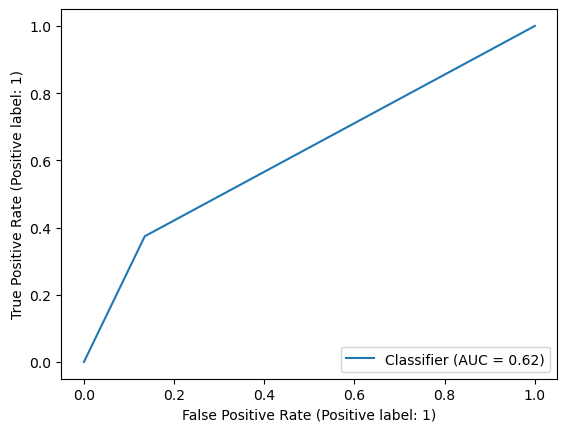

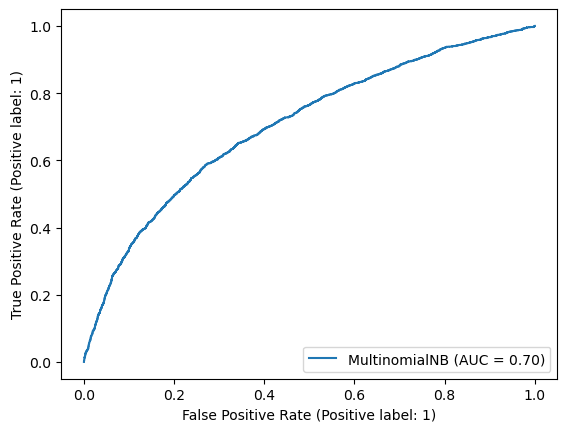

In [187]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)
print(matthews_corrcoef(y_test, y_pred))

print(lyrics_words[mnb.feature_log_prob_[0].argsort()[-1 : -101 : -1]])
print(lyrics_words[mnb.feature_log_prob_[1].argsort()[-1 : -101 : -1]])
important_pos = np.union1d(mnb.feature_log_prob_[0].argsort()[-1 : -501 : -1],
                           mnb.feature_log_prob_[1].argsort()[-1 : -3001 : -1])
# print(important_pos)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

RocCurveDisplay.from_predictions(y_pred, y_test)
RocCurveDisplay.from_estimator(mnb, X_test, y_test)

0.23195712523409862


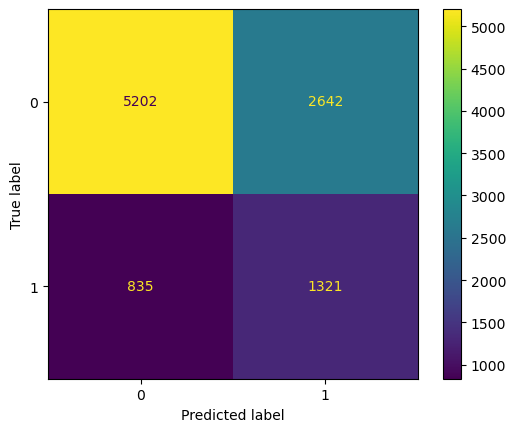

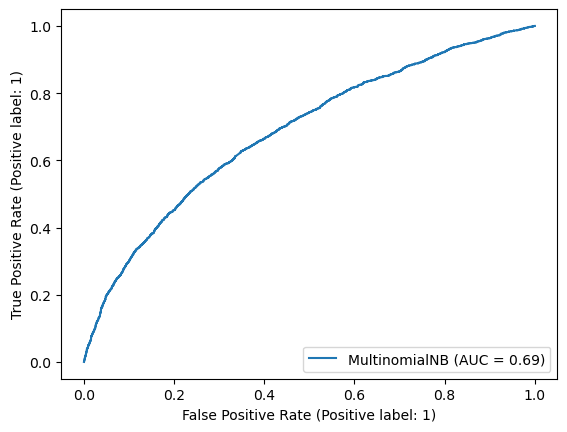

In [188]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

mnb = MultinomialNB()
y_pred = mnb.fit(X_train[:, important_pos], y_train).predict(X_test[:, important_pos])
print(matthews_corrcoef(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

RocCurveDisplay.from_estimator(mnb, X_test[:, important_pos], y_test)

0.26790331373650417


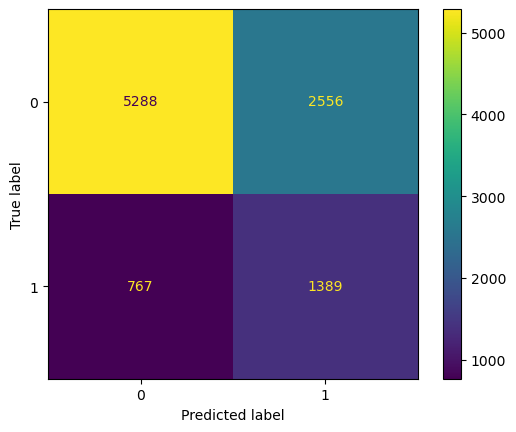

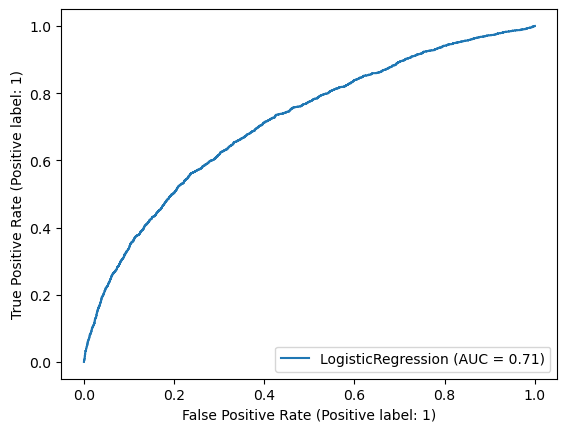

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

lr = LogisticRegression()
y_pred = lr.fit(X_train, y_train).predict(X_test)
print(matthews_corrcoef(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

RocCurveDisplay.from_estimator(lr, X_test, y_test)

0.2531708568940459


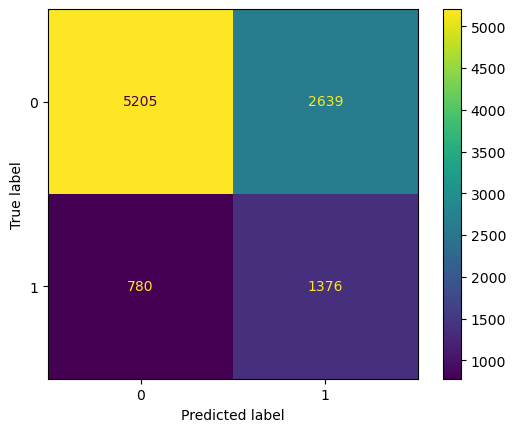

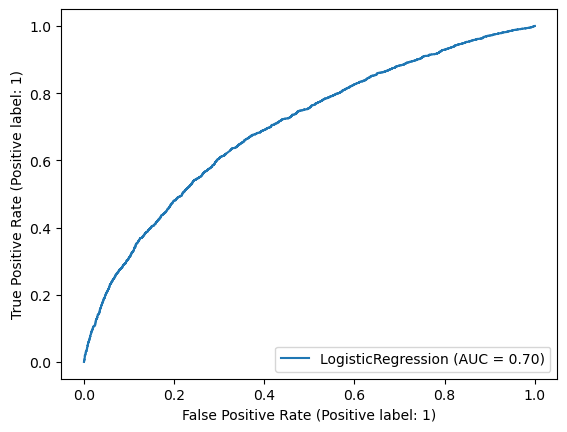

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

lr = LogisticRegression()
y_pred = lr.fit(X_train[:, important_pos], y_train).predict(X_test[:, important_pos])
print(matthews_corrcoef(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

RocCurveDisplay.from_estimator(lr, X_test[:, important_pos], y_test)

0.0675594907369544


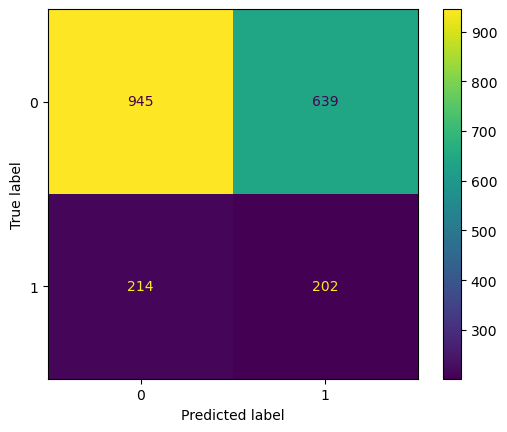

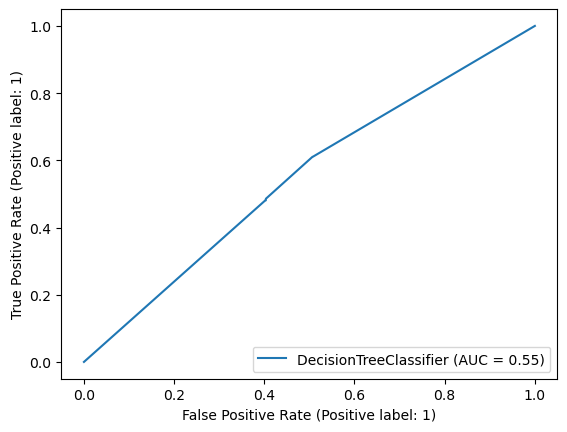

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

dtc = DecisionTreeClassifier()
y_pred = dtc.fit(X_train, y_train).predict(X_test)
print(matthews_corrcoef(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

RocCurveDisplay.from_estimator(dtc, X_test, y_test)

0.22684994182103066


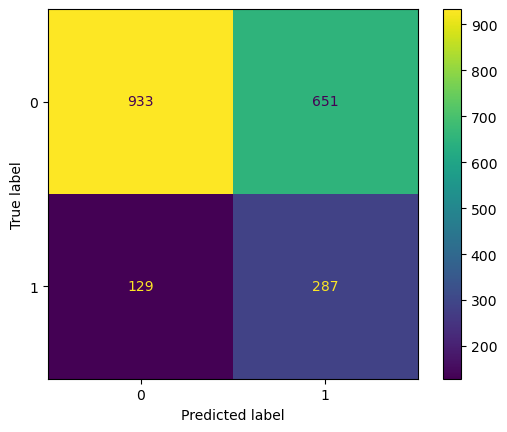

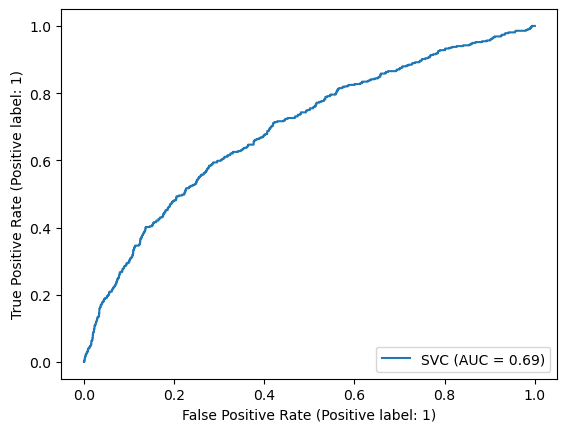

In [164]:
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

svc = SVC()
y_pred = svc.fit(X_train, y_train).predict(X_test)
print(matthews_corrcoef(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

RocCurveDisplay.from_estimator(svc, X_test, y_test)

0.18099613586811175


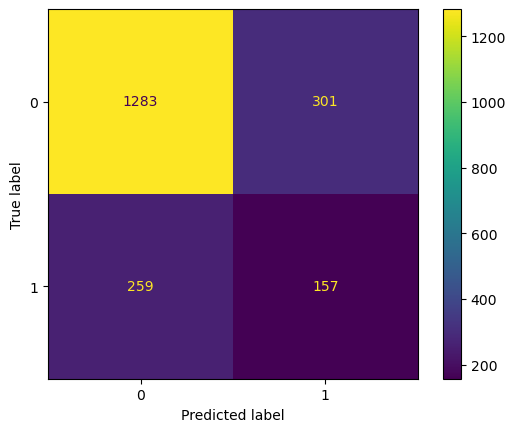

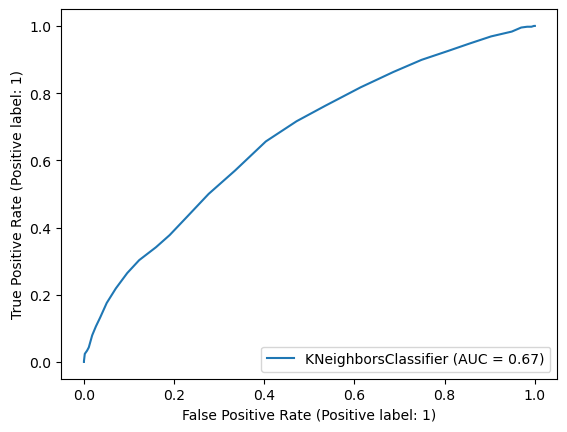

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

neigh = KNeighborsClassifier(n_neighbors=60)
y_pred = neigh.fit(X_train, y_train).predict(X_test)
print(matthews_corrcoef(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

RocCurveDisplay.from_estimator(neigh, X_test, y_test)

In [165]:
songs[genre_mat[:, genre_pos].astype(bool).todense()]

,name,url,genre,theme,label,country,location,status,date,years,album_url,band_name,album_name,album_type,song_name,song_id,lyrics
77,(V.E.G.A.),https://www.metal-archives.com/bands/%28V.E.G....,"Experimental Black Metal, Experimental/Electro...",['Insanity'],NaN,International,"Turin, Piedmont, Italy / Oslo, Norway",Unknown,1998.0,1998-?,https://www.metal-archives.com/bands/%28V.E.G....,(V.E.G.A.),Cocaine,Full-length,Beton #1,356068,"On the cement streets...\r\n...with Hate,\r\nU..."
78,(V.E.G.A.),https://www.metal-archives.com/bands/%28V.E.G....,"Experimental Black Metal, Experimental/Electro...",['Insanity'],NaN,International,"Turin, Piedmont, Italy / Oslo, Norway",Unknown,1998.0,1998-?,https://www.metal-archives.com/bands/%28V.E.G....,(V.E.G.A.),Cocaine,Full-length,Burning in My Own Dream of Life,356069,"Grey clouds darken my mind, rain slows down it..."
79,(V.E.G.A.),https://www.metal-archives.com/bands/%28V.E.G....,"Experimental Black Metal, Experimental/Electro...",['Insanity'],NaN,International,"Turin, Piedmont, Italy / Oslo, Norway",Unknown,1998.0,1998-?,https://www.metal-archives.com/bands/%28V.E.G....,(V.E.G.A.),Cocaine,Full-length,Consumed Seclusion,356070,"In a vast ocean, in the penetrating dark of th..."
80,(V.E.G.A.),https://www.metal-archives.com/bands/%28V.E.G....,"Experimental Black Metal, Experimental/Electro...",['Insanity'],NaN,International,"Turin, Piedmont, Italy / Oslo, Norway",Unknown,1998.0,1998-?,https://www.metal-archives.com/bands/%28V.E.G....,(V.E.G.A.),Cocaine,Full-length,Insex Infect,356066,Ich reiss mir adern aus. Mein blut. schwarz un...
81,(V.E.G.A.),https://www.metal-archives.com/bands/%28V.E.G....,"Experimental Black Metal, Experimental/Electro...",['Insanity'],NaN,International,"Turin, Piedmont, Italy / Oslo, Norway",Unknown,1998.0,1998-?,https://www.metal-archives.com/bands/%28V.E.G....,(V.E.G.A.),Cocaine,Full-length,Kill Me,356072,"(,,,Ny Art is the Engraved Heart of God...) Lo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799759,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,Songs for Darkspirits,Full-length,"Sweet, Gesture of the Death",1150474,"slumber,\r\nPeace.\r\n\r\nthis harmony to natu..."
799760,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,When Fatigue Devours Reincarnation,EP,Diary of a Decaying Man,1150491,At the end of Chaos(The man who engulfed himse...
799761,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,흉가,Full-length,통곡의 서막 / Prelude to Tremendous Sadness,2213275,"my lady, wake up,\r\nin this cold night.\r\nyo..."
799762,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,흉가,Full-length,흉가에 얽힌 이야기 Part III / The Tale from the Hounte...,2213273,Beauty was this hill\r\nfilled with this blood...


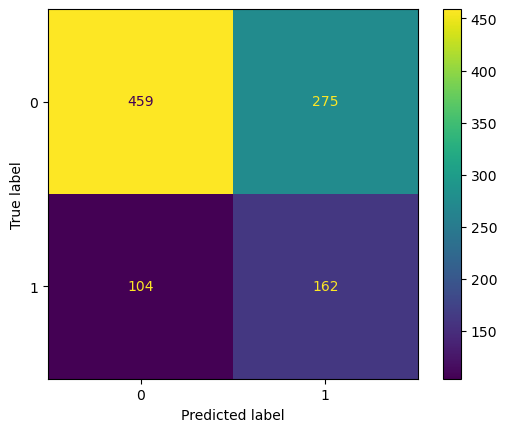

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

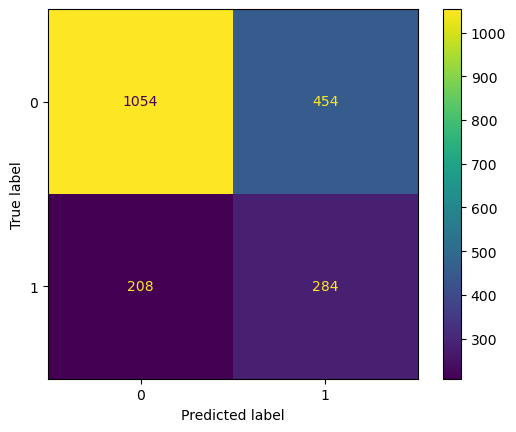

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()